In [1]:
# Header for the notebook
from datetime import datetime
from IPython.display import display, Markdown

# Get the current date
title = "Circular Task analysis Assignment"
current_date = datetime.now().strftime("%d %B %Y, %H:%M:%S")
authors = "Antoine Lescarboura & Alexis Lagarde"

# Insert the date into the notebook
display(Markdown(f"# {title}"))
display(Markdown(f"{current_date}"))
display(Markdown(f"by {authors}"))

# Circular Task analysis Assignment

22 November 2025, 20:14:04

by Antoine Lescarboura & Alexis Lagarde

In [2]:
# imports (this is all you need for this assignment - please, do not import anything else)
import numpy as np
import matplotlib.pyplot as plt
import os

# very useful for zoomable plots in Jupyter notebooks
%matplotlib widget

# import pandas as pd # we do not use pandas here

In [3]:
file = './data/001MoDe_R1.csv'
file2 = './data/001MoDe_R1.marker.csv'

with open(file, 'r', encoding='utf-8') as f:
    firstLine = f.readline().strip()


if firstLine:
    data = firstLine.split(';')
    print("Header line information in 'data/001MoDe_R1.csv':")
    for d in data:
        print("  " + d.strip())


Header line information in 'data/001MoDe_R1.csv':
  screenWidth 1104
  screenHeight 661
  cornerX 302
  cornerY 80
  centerX 552
  centerY 330
  externalRadius 250
  internalRadius 170
  borderRadius 1
  cursorRadius 16
  indexOfDifficulty 28.00696429476858
  taskRadius 209.5
  taskTolerance 47
  borderColor java.awt.Color[r=255,g=255,b=255]
  backgroundColor java.awt.Color[r=0,g=0,b=0]
  cursorColorRecord java.awt.Color[r=255,g=0,b=0]
  cursorColorWait java.awt.Color[r=255,g=255,b=0]
  autoStart 3600
  cycleMaxNumber 6
  cycleDuration 20
  software LSL-mouse
  version 1.2.0rc5
  task CircularTarget
  isWithLSL false


In [ ]:

print("Markers in 'data/001MoDe_R1.marker.csv':")


lines_after_date = []       # stocke les lignes après chaque date
processing_block = False    # indique si on est dans un bloc après une date

def print_aligned_block(lines):
    if not lines:
        return

    # Découpe chaque ligne en colonnes
    split_lines = [line.split(',') for line in lines]

    # Trouve la largeur max de chaque colonne
    max_widths = []
    num_cols = max(len(cols) for cols in split_lines)

    for col in range(num_cols):
        max_width = 0
        for cols in split_lines:
            if col < len(cols):
                max_width = max(max_width, len(cols[col].strip()))
        max_widths.append(max_width)

    # Recompose chaque ligne alignée
    for cols in split_lines:
        padded = []
        for i, col in enumerate(cols):
            padded.append(col.strip().ljust(max_widths[i]))
        print("  " + " , ".join(padded))  # virgules alignées


with open(file2, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i < 3:
            continue

        stripped = line.strip()

        if date_pattern.match(stripped):
            # Avant de commencer un nouveau bloc → imprimer l'ancien
            print_aligned_block(lines_after_date)
            lines_after_date = []

            # Traitement de la ligne avec date
            parts = stripped.split(',', 1)
            stripped = parts[1] if len(parts) > 1 else stripped

            subparts = stripped.split(',', 1)
            if len(subparts) == 2:
                stripped = f"{subparts[0]}: {subparts[1]}"

            print(stripped)
            processing_block = True

        else:
            # Ajouter la ligne dans le bloc à aligner
            if processing_block:
                lines_after_date.append(stripped)
            else:
                print(" " + stripped)


print_aligned_block(lines_after_date)


Markers in 'data/001MoDe_R1.marker.csv':
1616776712325: KeyTyped=32 DoCycleChange
1616776712331: DoCycleChange:DoStartCycleTimedSequence
1616776712333: DoCycleChange:DoRecord RecordDone=0 PauseDone=0 ToDo=6
1616776732336: DoCycleChange:DoPause RecordDone=1 PauseDone=0 ToDo=6
1616776752340: DoCycleChange:DoRecord RecordDone=1 PauseDone=1 ToDo=6
1616776772351: DoCycleChange:DoPause RecordDone=2 PauseDone=1 ToDo=6
1616776792372: DoCycleChange:DoRecord RecordDone=2 PauseDone=2 ToDo=6
1616776812386: DoCycleChange:DoPause RecordDone=3 PauseDone=2 ToDo=6
1616776832390: DoCycleChange:DoRecord RecordDone=3 PauseDone=3 ToDo=6
1616776852404: DoCycleChange:DoPause RecordDone=4 PauseDone=3 ToDo=6
1616776872419: DoCycleChange:DoRecord RecordDone=4 PauseDone=4 ToDo=6
1616776892433: DoCycleChange:DoPause RecordDone=5 PauseDone=4 ToDo=6
1616776898364: KeyTyped=113 WINDOW_CLOSING
1616776898367: 
  Var    , nLaps  , Re     , Te    , error , MT/lap , IDe/lap , Be     , IPe   , 
  unit   , lap    , pixel  

In [10]:
def get_cell(file, cell_ref, sep=","):
    col_letters = "".join(filter(str.isalpha, cell_ref)).upper()
    row_number = int("".join(filter(str.isdigit, cell_ref)))

    row_index = row_number - 1

    col_index = 0
    for char in col_letters:
        col_index = col_index * 26 + (ord(char) - ord("A") + 1)
    col_index -= 1

    with open(file, "r", encoding="utf-8") as f:
        lines = f.readlines()

    line = lines[row_index].strip()

    cols = line.split(sep)

    return cols[col_index]

In [11]:
rt1_start = get_cell(file, "A5")
rt1_end = get_cell(file, "A3976")
rt2_start = get_cell(file, "A3978")
rt2_end = get_cell(file, "A7875")
rt3_start = get_cell(file, "A7877")
rt3_end = get_cell(file, "A11774")
rt4_start = get_cell(file, "A11776")
rt4_end = get_cell(file, "A15659")
rt5_start = get_cell(file, "A15661")
rt5_end = get_cell(file, "A19596")

time_diff_rt1 = (int(rt1_end) - int(rt1_start)) /1000
time_diff_rt2 = (int(rt2_end) - int(rt2_start)) /1000
time_diff_rt3 = (int(rt3_end) - int(rt3_start)) /1000
time_diff_rt4 = (int(rt4_end) - int(rt4_start)) /1000
time_diff_rt5 = (int(rt5_end) - int(rt5_start)) /1000


print("record times (milliseconds since the Unix epoch, 00:00:00 UTC on January 1, 1970):")
print(rt1_start, "to", rt1_end, "(",time_diff_rt1," s)")
print(rt2_start, "to", rt2_end, "(",time_diff_rt2," s)")
print(rt3_start, "to", rt3_end, "(",time_diff_rt3," s)")
print(rt4_start, "to", rt4_end, "(",time_diff_rt4," s)")   
print(rt5_start, "to", rt5_end, "(",time_diff_rt5," s)")


record times (milliseconds since the Unix epoch, 00:00:00 UTC on January 1, 1970):
1616776712329 to 1616776732333 ( 20.004  s)
1616776752758 to 1616776772347 ( 19.589  s)
1616776792700 to 1616776812379 ( 19.679  s)
1616776832937 to 1616776852398 ( 19.461  s)
1616776872475 to 1616776892427 ( 19.952  s)


In [12]:
first_dorecord_marker = 1616776712329

rt1_timestart = (int(rt1_start) - first_dorecord_marker) /1000
rt1_timeend = (int(rt1_end) - first_dorecord_marker) /1000
rt2_timestart = (int(rt2_start) - first_dorecord_marker) /1000
rt2_timeend = (int(rt2_end) - first_dorecord_marker) /1000
rt3_timestart = (int(rt3_start) - first_dorecord_marker) /1000
rt3_timeend = (int(rt3_end) - first_dorecord_marker) /1000
rt4_timestart = (int(rt4_start) - first_dorecord_marker) /1000
rt4_timeend = (int(rt4_end) - first_dorecord_marker) /1000
rt5_timestart = (int(rt5_start) - first_dorecord_marker) /1000
rt5_timeend = (int(rt5_end) - first_dorecord_marker) /1000

print("record times (seconds since the first DoRecord marker):")
print(rt1_timestart, "to", rt1_timeend, "(",time_diff_rt1," s)")
print(rt2_timestart, "to", rt2_timeend, "(",time_diff_rt2," s)")
print(rt3_timestart, "to", rt3_timeend, "(",time_diff_rt3," s)")
print(rt4_timestart, "to", rt4_timeend, "(",time_diff_rt4," s)")
print(rt5_timestart, "to", rt5_timeend, "(",time_diff_rt5," s)")

record times (seconds since the first DoRecord marker):
0.0 to 20.004 ( 20.004  s)
40.429 to 60.018 ( 19.589  s)
80.371 to 100.05 ( 19.679  s)
120.608 to 140.069 ( 19.461  s)
160.146 to 180.098 ( 19.952  s)


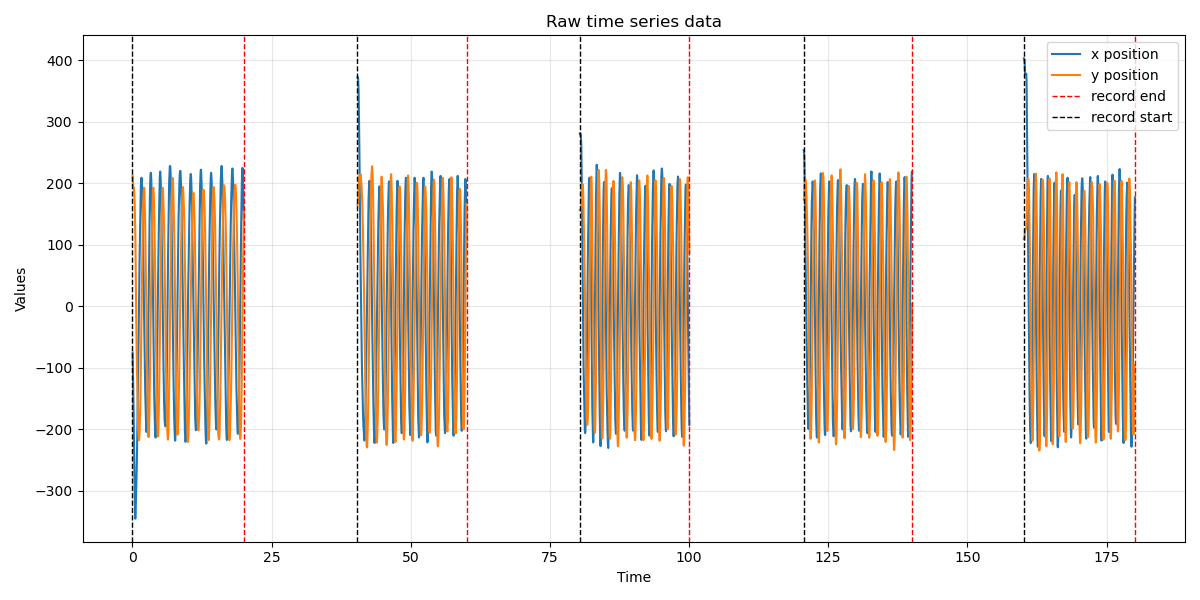

In [ ]:
timestamps = []
mouseX_list = []
mouseY_list = []

with open(file, 'r') as f:
    lines = f.readlines()
    for i in range(1, len(lines)):
        line = lines[i].strip()
        if not line:
            continue
        parts = line.split(',')
        if len(parts) >= 3:
            try:
                ts = int(parts[0])
                mx = float(parts[1])
                my = float(parts[2])
                timestamps.append(ts)
                mouseX_list.append(mx)
                mouseY_list.append(my)
            except:
                continue

timestamp = np.array(timestamps, dtype=np.int64)
mouseX = np.array(mouseX_list)
mouseY = np.array(mouseY_list)

mouseX_centered = mouseX - np.mean(mouseX)
mouseY_centered = mouseY - np.mean(mouseY)

segments = [
    ("RT1", 5, 3976),
    ("RT2", 3978, 7875),
    ("RT3", 7877, 11774),
    ("RT4", 11776, 15659),
    ("RT5", 15661, 19596)
]

def extract_segment(start, end):
    start_idx = start - 1
    end_idx = end
    return timestamp[start_idx:end_idx], mouseX_centered[start_idx:end_idx], mouseY_centered[start_idx:end_idx]

plt.figure(figsize=(12, 6))

for i, (name, start, end) in enumerate(segments):
    ts_seg, x_seg, y_seg = extract_segment(start, end)

    ts_seg = np.where(ts_seg == 0, np.nan, ts_seg)
    x_seg = np.where(ts_seg == np.nan, np.nan, x_seg)
    y_seg = np.where(ts_seg == np.nan, np.nan, y_seg)

    t_rel_global = (ts_seg - timestamp[0]) / 1000.0

    if i == 0:
        plt.plot(t_rel_global, x_seg, color="tab:blue", linestyle='-', linewidth=1.5, label="x position")
        plt.plot(t_rel_global, y_seg, color="tab:orange", linestyle='-', linewidth=1.5, label="y position")
    else:
        plt.plot(t_rel_global, x_seg, color="tab:blue", linestyle='-', linewidth=1.5)
        plt.plot(t_rel_global, y_seg, color="tab:orange", linestyle='-', linewidth=1.5)
        
valid_ts_indices = np.where(timestamp != 0)[0]

if len(valid_ts_indices) > 0:
    first_valid_idx = valid_ts_indices[0]
    t_first_valid = (timestamp[first_valid_idx] - timestamp[0]) / 1000.0
    plt.axvline(x=t_first_valid, color='black', linestyle='--', linewidth=1)

# ➤ Lignes verticales autour des timestamps = 0
zero_indices = np.where(timestamp == 0)[0]

record_start_added = False
record_end_added = False

for idx in zero_indices:
    prev_idx = idx - 1
    next_idx = idx + 1

    if prev_idx >= 0:
        t_black = (timestamp[prev_idx] - timestamp[0]) / 1000.0
        if not record_end_added:
            plt.axvline(x=t_black, color='red', linestyle='--', linewidth=1, label="record end")
            record_end_added = True
        else:
            plt.axvline(x=t_black, color='red', linestyle='--', linewidth=1)

    if next_idx < len(timestamp):
        t_red = (timestamp[next_idx] - timestamp[0]) / 1000.0
        if not record_start_added:
            plt.axvline(x=t_red, color='black', linestyle='--', linewidth=1, label="record start")
            record_start_added = True
        else:
            plt.axvline(x=t_red, color='black', linestyle='--', linewidth=1)


plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Raw time series data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

